In [54]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

import torch.nn.functional as F
from torchvision.datasets import ImageFolder
import torchvision.transforms as tf
import torchvision.datasets as tfds
import torchvision
from torchvision.transforms import ToPILImage

In [27]:
imgfolder = ImageFolder('./COVID-19_Radiography_Database/images/',
                       transform=tf.Compose([tf.Resize(1024,1024),tf.ToTensor(),
                                            ]))

In [88]:
dataset_loader = torch.utils.data.DataLoader(imgfolder,
                                             batch_size=2, shuffle=True)

In [92]:
f = next(iter(dataset_loader))[0]

In [93]:
f.shape

torch.Size([2, 3, 1024, 1024])

In [85]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

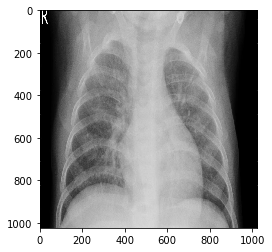

In [86]:
show(f)

In [12]:
f.shape

torch.Size([3, 1024, 1024])

In [107]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 3, stride=2) #512
        self.conv2 = nn.Conv2d(6, 16, 3, stride=2) #256
        self.conv3 = nn.Conv2d(16, 24, 3, stride=2) #128
        self.conv4 = nn.Conv2d(24, 32, 3, stride=2) #64
        self.flatten = nn.Flatten()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(288, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,3)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.fc4(x)
        return x



net = Net()

In [108]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001, )

In [109]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataset_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.011
[1,   201] loss: 1.145
[1,   401] loss: 0.930
[1,   601] loss: 0.735
[1,   801] loss: 0.671
[1,  1001] loss: 0.570
[1,  1201] loss: 0.533
[1,  1401] loss: 0.512
[2,     1] loss: 0.001
[2,   201] loss: 0.421
[2,   401] loss: 0.424
[2,   601] loss: 0.421
[2,   801] loss: 0.459
[2,  1001] loss: 0.411
[2,  1201] loss: 0.421
[2,  1401] loss: 0.330
Finished Training


In [110]:
output = net(f)

In [111]:
output

tensor([[  0.5934,  -0.2629,   3.3158,  -9.6074, -10.4902, -10.2626, -10.7371,
         -10.3324, -10.5349, -10.7059],
        [ -0.1611,   0.1612,   2.4491,  -6.7496,  -7.4651,  -7.3076,  -7.3945,
          -7.2733,  -7.3620,  -7.3574]], grad_fn=<AddmmBackward>)